In [ ]:
from imports import *
import traces_rdf
%matplotlib inline

In [2]:
UCB_C = 'data/HVeV_fits/UCB-C-1.95eV_51231212_000000.root'
iZIP7 = 'data/iZIP7_FET/iZIP7-FET_51240120_000000.root'
iZIP5 = 'data/iZIP7_FET/iZIP5-FET_51240121_000000.root'
NRsamp = 'data/Downsampling/NR-sampling/NRsamp-.7keV-V08-05-00_51240130_0000.root'
NRfix = 'data/Downsampling/NR-sampling/NRsamp-.7keV-G4CMP393_51240130_0000.root'
NRwrong = 'data/Downsampling/NR-sampling/Sukee_2Mar-G4CMP-V08-06-00/BulkNR_1keVt_10events_ODE_Mar2_51240302_0000.root'
NRrefix = 'data/Downsampling/NR-sampling/NRsamp-.7keV-V11-05-00+V08-06-00_51240302_0000.root'
Preset = 'data/TES_preset/presetTES_51240202_000000.root'
HVeVpreset = 'data/TES_preset/presetTES-NFC_51240201_000000.root'
PresetFix = 'data/TES_preset/presetTES-NFC-elog1858_51240202_000000.root'
iZIP7DC3 = 'data/iZIP7_FET/preDC3/DMCER_zip_iZIP7_51231218_000000.root'

# --------------------------------------------------------------------------
# Event Number of Interest
event = 0

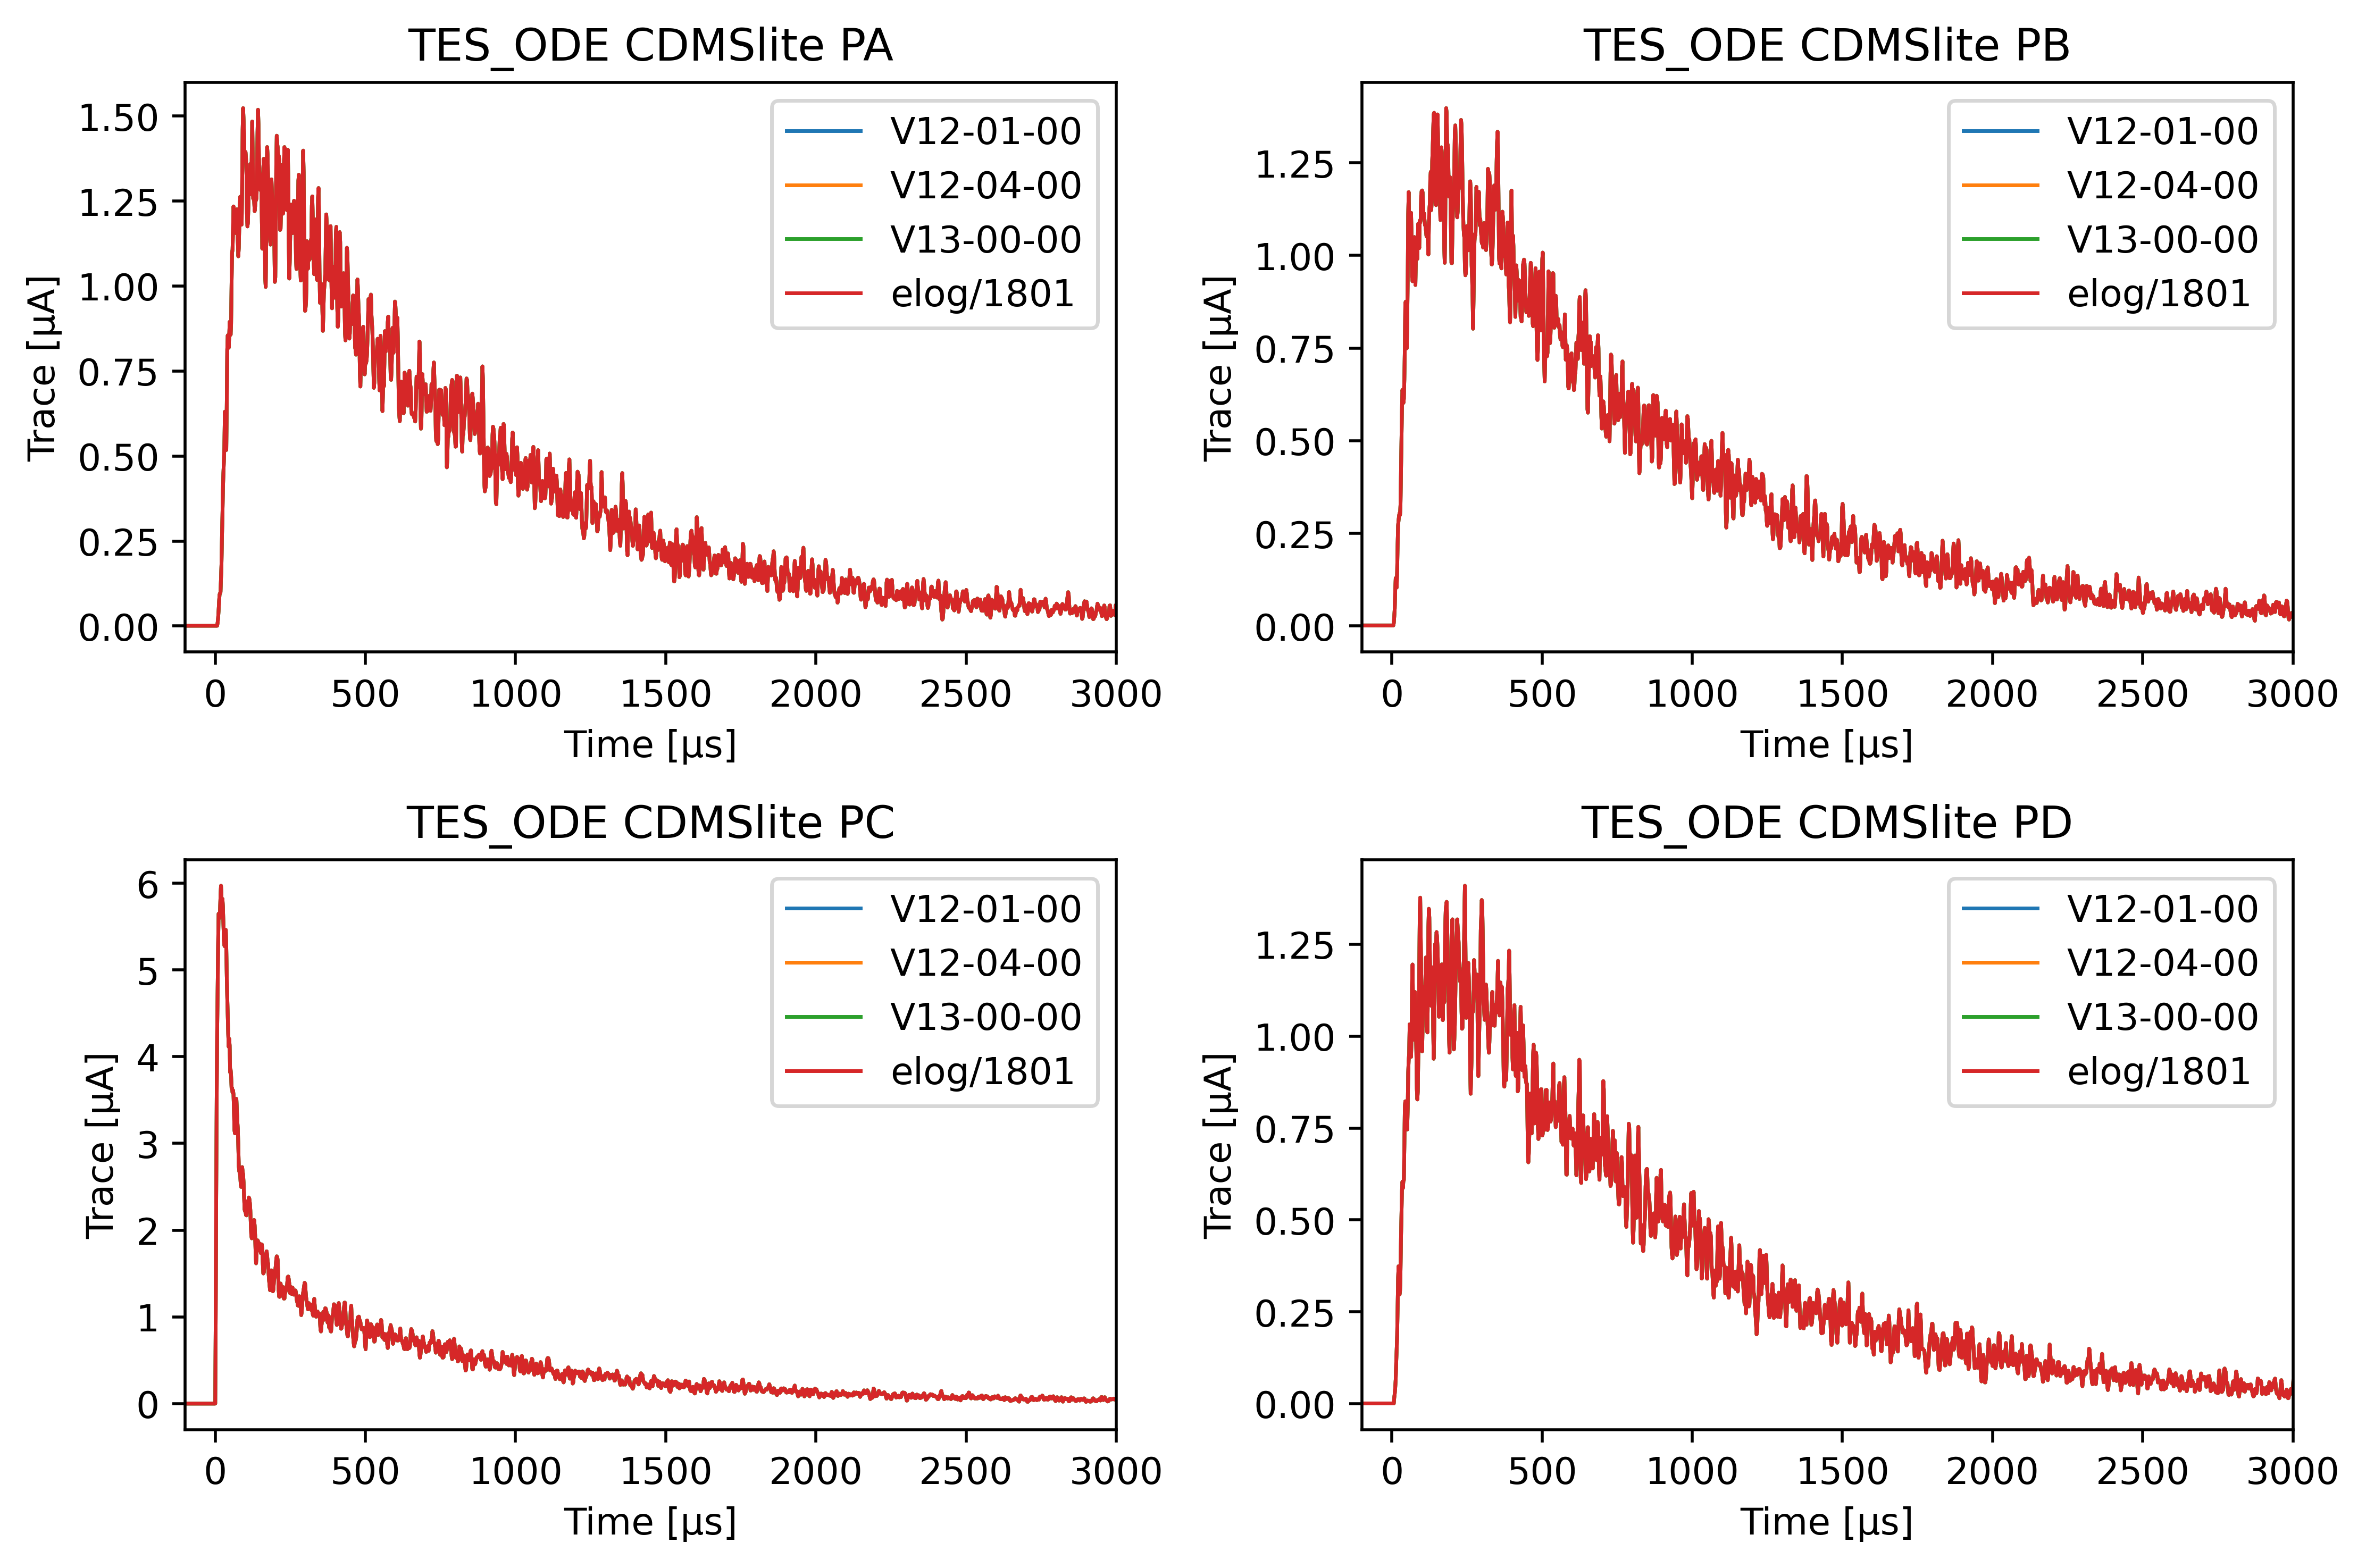

In [8]:
# Overlay the four TES_ODE tests of fast/slow energy
files = {"V12-01-00": lite12_01,
         "V12-04-00": lite12_04,
         "V13-00-00": lite13_00,
         "elog/1801": lite1801,
        }

fig, axes = subplots(2,2,figsize=(9,6), dpi=500)
fig.set_tight_layout(True)
chans = traces_rdf.getChannels(lite1801, "TES", event)

for plot in range(4):
    currentAxis = axes.flatten()[plot]

    # Plot the TES trace from the four jobs
    i = -1
    for name,file in files.items():
        i += 1    # Use this for the colors
        bins, trace, _,_ = traces_rdf.getTES(file, event, plot)
        currentAxis.plot(bins, trace, lw=1, color=f"C{i}", label=name)

    currentAxis.set_xlim([-100.,3000.])
    currentAxis.set_xlabel("Time [\u03BCs]")
    currentAxis.set_ylabel("Trace [\u03BCA]")
    currentAxis.set_title(f"TES_ODE CDMSlite {chans[plot]}")
    currentAxis.legend(loc="upper right")

fig.savefig("CDMSlite_ODEversions.png")

In [5]:
# Four CDMSlite TES traces
fig, axes = subplots(2,2,figsize=(9,6), dpi = 1000)
fig.set_tight_layout(True)
chans = traces_rdf.getChannels(NRrefix, "TES", event)

for plot in range(4):
    currentAxis = axes.flatten()[plot]
    
    # Get TES trace for plotting
    bins, trace, _,_ = traces_rdf.getTES(NRrefix, event, plot)
    currentAxis.plot(bins, trace, lw=1, color = 'C0', label='TESSim Trace')
    
    currentAxis.set_xlim([-100.,3000.])
    currentAxis.set_xlabel("Time [\u03BCs]")
    currentAxis.set_ylabel("Trace [\u03BCA]")
    currentAxis.set_title('SuperSim V11-05-00, G4CMP V08-06-00\nTrace for ' + chans[plot] + ' in Event ' + str(event))

fig.savefig("CDMSlite_NRrefix.png")

/sw/eb/sw/matplotlib/3.0.0-foss-2018b-Python-3.6.6/lib/python3.6/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


In [7]:
# Sum up the pseudo-TES power profiles for each channel, then plot those
nbins, T0, width = traces_rdf.loadBinning(file, "TES", event, 0)
bins, power = traces_rdf.getRawTES(file, event, 0, "PowerIn")
print(power)
totalPower = [sum(bin) for bin in zip(*power)]
print(max(totalPower))

wattToeV = width*1e-6 / 1.602176634e-19
print(max(totalPower)*wattToeV)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1.0113739074187499e-11
50.499995366615735


In [8]:
# Two HVeV TES channels
fig, axes = subplots(1,2,figsize=(9,6), dpi = 1000)
fig.set_tight_layout(True)
chans = traces_rdf.getChannels(PresetFix, "TES", event)

for plot in range(2):
    currentAxis = axes.flatten()[plot]
    
    # Get FET trace for plotting
    bins, trace, _,_ = traces_rdf.getTES(PresetFix, event, plot)
    currentAxis.plot(bins, trace, lw=1, color = 'C0', label='TESSim Trace')
    
    currentAxis.set_xlim([-100.,1000.])
    currentAxis.set_xlabel("Time [\u03BCs]")
    currentAxis.set_ylabel("Trace [\u03BCA]")
    currentAxis.set_title('Preset ' + chans[plot])

fig.savefig("Preset-HVeV_elog1858.png")

In [9]:
# Twelve iZIP7 TES channels, generated with SetPhononE
fig, axes = subplots(3,4,figsize=(9,6), dpi = 1000)
fig.set_tight_layout(True)
chans = traces_rdf.getChannels(Preset, "TES", event)

for plot in range(12):
    currentAxis = axes.flatten()[plot]
    
    # Get FET trace for plotting
    bins, trace, _,_ = traces_rdf.getTES(Preset, event, plot)
    currentAxis.plot(bins, trace, lw=1, color = 'C0', label='TESSim Trace')
    
    currentAxis.set_xlim([-100.,1000.])
    currentAxis.set_xlabel("Time [\u03BCs]")
    currentAxis.set_ylabel("Trace [\u03BCA]")
    currentAxis.set_title('Preset' + chans[plot])

fig.savefig("Preset_elog1854.png")

In [10]:
# Four CDMSlite TES traces
fig, axes = subplots(2,2,figsize=(9,6), dpi = 1000)
fig.set_tight_layout(True)
chans = traces_rdf.getChannels(NRfix, "TES", event)

for plot in range(4):
    currentAxis = axes.flatten()[plot]
    
    # Get FET trace for plotting
    bins, trace, _,_ = traces_rdf.getTES(NRfix, event, plot)
    currentAxis.plot(bins, trace, lw=1, color = 'C0', label='TESSim Trace')
    
    currentAxis.set_xlim([-100.,3000.])
    currentAxis.set_xlabel("Time [\u03BCs]")
    currentAxis.set_ylabel("Trace [\u03BCA]")
    currentAxis.set_title('G4CMP-393 Trace for ' + chans[plot] + ' in Event ' + str(event))

fig.savefig("CDMSlite_G4CMP393.png")

In [11]:
# Four CDMSlite TES traces
fig, axes = subplots(2,2,figsize=(9,6), dpi = 1000)
fig.set_tight_layout(True)
chans = traces_rdf.getChannels(NRsamp, "TES", event)

for plot in range(4):
    currentAxis = axes.flatten()[plot]
    
    # Get FET trace for plotting
    bins, trace, _,_ = traces_rdf.getTES(NRsamp, event, plot)
    currentAxis.plot(bins, trace, lw=1, color = 'C0', label='TESSim Trace')
    
    currentAxis.set_xlim([-100.,3000.])
    currentAxis.set_xlabel("Time [\u03BCs]")
    currentAxis.set_ylabel("Trace [\u03BCA]")
    currentAxis.set_title('V08-05-00 Trace for ' + chans[plot] + ' in Event ' + str(event))

fig.savefig("CDMSlite_V08-05-00.png")

In [17]:
# FET channels
fig, axes = subplots(2,2,figsize=(9,6), dpi = 1000)
fig.set_tight_layout(True)
chans = traces_rdf.getChannels(iZIP5, "FET", event)

for plot in range(4):
    currentAxis = axes.flatten()[plot]
    
    # Get FET trace for plotting
    bins, trace = traces_rdf.getRawFET(iZIP5, event, plot)
    currentAxis.plot(bins, trace, lw=1, color = 'C0', label='FETSim Trace')
    
    currentAxis.set_xlim([-100.,3000.])
    currentAxis.set_xlabel("Time [\u03BCs]")
    currentAxis.set_ylabel("Trace [mV]")
    currentAxis.set_title('Trace for ' + chans[plot] + ' in Event ' + str(event))